In [8]:
import pandas as pd

df = pd.read_csv("./dataset/sonar.csv", header=None)
df.info()

# rangeindex가 208개 - 샘플수
# 컬럼수는 61개 속성 60개 class 1개
#


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [4]:
# 데이터 입력
df = pd.read_csv("./dataset/sonar.csv", header=None)

dataset = df.values
x = dataset[:, :60].astype(float)
y_obj = dataset[:, -1]

In [5]:
# 문자열 변환
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

In [6]:
# 모델설정 -> 결과가 두가지이니 sigmoid 함수를 사용
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델 컴파일
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [8]:
#모델 학습
model.fit(x, y, epochs = 200, batch_size = 5)

Epoch 1/200
42/42 [==============================] - 1s 2ms/step - loss: 0.6795 - accuracy: 0.5913
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6250
Epoch 3/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.6587
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7067
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7644
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7500
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7644
Epoch 8/200
42/42 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7740
Epoch 9/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.7788
Epoch 10/200
42/42 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.7788
Epoch 11/

42/42 [==============================] - 0s 4ms/step - loss: 0.1252 - accuracy: 0.9615
Epoch 84/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1269 - accuracy: 0.9471
Epoch 85/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1247 - accuracy: 0.9567
Epoch 86/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1225 - accuracy: 0.9567
Epoch 87/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1137 - accuracy: 0.9663
Epoch 88/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1556 - accuracy: 0.9327
Epoch 89/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1131 - accuracy: 0.9712
Epoch 90/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1113 - accuracy: 0.9615
Epoch 91/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1100 - accuracy: 0.9663
Epoch 92/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1097 - accuracy: 0.9519
Epoch 93/200


In [9]:
# 결과 출력 - 정확도는 100%지만 과접합하게 된것임
print(f"Accuracy : {model.evaluate(x, y)[1]}")

7/7 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000
Accuracy : 1.0


# 학습셋과 테스트셋을 분리
### 만약 학습셋의 정확도는 올라가지만 테스트셋의 정확도가 낮아지는 순간 과적합이 발생하는것이다.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
# seed값
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# 데이터 입력
df = pd.read_csv("./dataset/sonar.csv", header=None)

dataset = df.values
x = dataset[:, :60].astype(float)
y_obj = dataset[:, -1]

# 문자열 변환
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

In [5]:
# 학습셋과 테스트셋 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)

# 모델설정 
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

# 모델 컴파일
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 학습
# model.fit(x_train, y_train, epochs = 130, batch_size = 5)
hist = model.fit(x_train, y_train, epochs = 130, batch_size = 5, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________
Epoch 1/130
29/29 [==============================] - 2s 18ms/step - loss: 0.6848 - accuracy: 0.5310 - val_loss: 0.6629 - val_accuracy: 0.6032
Epoch 2/130
29/29 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6414 - val_loss: 0.6400 - val_accuracy: 0.7143
Epoch 3/130
29/29 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.6828 - 

29/29 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 0.8897 - val_loss: 0.4537 - val_accuracy: 0.8095
Epoch 54/130
29/29 [==============================] - 0s 4ms/step - loss: 0.2302 - accuracy: 0.8897 - val_loss: 0.4522 - val_accuracy: 0.7937
Epoch 55/130
29/29 [==============================] - 0s 4ms/step - loss: 0.2248 - accuracy: 0.9241 - val_loss: 0.4878 - val_accuracy: 0.8413
Epoch 56/130
29/29 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.9034 - val_loss: 0.4667 - val_accuracy: 0.8571
Epoch 57/130
29/29 [==============================] - 0s 4ms/step - loss: 0.2146 - accuracy: 0.8966 - val_loss: 0.4610 - val_accuracy: 0.8254
Epoch 58/130
29/29 [==============================] - 0s 4ms/step - loss: 0.2138 - accuracy: 0.9241 - val_loss: 0.4590 - val_accuracy: 0.8413
Epoch 59/130
29/29 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9310 - val_loss: 0.4861 - val_accuracy: 0.8571
Epoch 60/130
29/29 

Epoch 111/130
29/29 [==============================] - 0s 4ms/step - loss: 0.0723 - accuracy: 0.9862 - val_loss: 0.6088 - val_accuracy: 0.8254
Epoch 112/130
29/29 [==============================] - 0s 4ms/step - loss: 0.0608 - accuracy: 1.0000 - val_loss: 0.6248 - val_accuracy: 0.8254
Epoch 113/130
29/29 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.9931 - val_loss: 0.6117 - val_accuracy: 0.8254
Epoch 114/130
29/29 [==============================] - 0s 4ms/step - loss: 0.0573 - accuracy: 0.9931 - val_loss: 0.5815 - val_accuracy: 0.8254
Epoch 115/130
29/29 [==============================] - 0s 4ms/step - loss: 0.0615 - accuracy: 0.9931 - val_loss: 0.6858 - val_accuracy: 0.8254
Epoch 116/130
29/29 [==============================] - 0s 4ms/step - loss: 0.0632 - accuracy: 0.9862 - val_loss: 0.6258 - val_accuracy: 0.8254
Epoch 117/130
29/29 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9862 - val_loss: 0.5897 - val_accuracy: 0.8254

In [6]:
# 테스트셋으로 검증
print(f"정확도 : {model.evaluate(x_test, y_test)[1]}")

2/2 [==============================] - 0s 5ms/step - loss: 0.6266 - accuracy: 0.8413
정확도 : 0.841269850730896


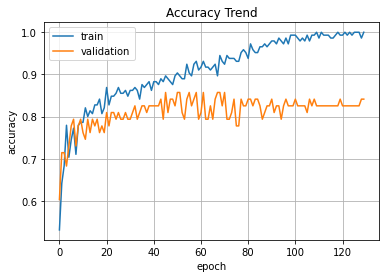

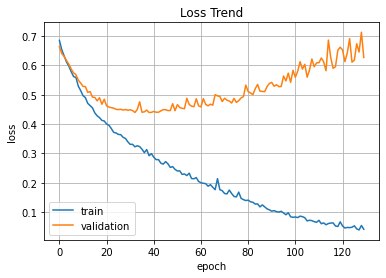

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy Trend")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss Trend")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()

# 모델 저장과 재사용

In [8]:
from tensorflow.keras.models import load_model

model.save('my_model.h5')

In [10]:
# 테스트를 위해 모델 삭제
del model

# 모델 불러오기
model = load_model("my_model.h5")

In [11]:
# 불러온 모델로 테스트 실행
print(f"정확도 : {model.evaluate(x_test, y_test)[1]}")

2/2 [==============================] - 0s 7ms/step - loss: 0.6266 - accuracy: 0.8413
정확도 : 0.841269850730896
